# Programming exercises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 1
**Question 1:** Write a algoritem which turns any given number of the 10th base and prints it as a 2,8 and 16th base number

In [3]:
number = 20 # Here you write a number of your chosing, has to be from the 10th base - daily used numbers
print('Given number:',number) 
print('in bin(2) =', bin(number)) # bin() translates any given number of the 10th basis to a binary number - base 2
print('in oct(8) =', oct(number)) # oct() translates any given number of the 10th basis to a Octal number - base 8
print('in hex(16) =', hex(number))# hex() translates any given number of the 10th basis to a hexadecimal number - base 16

Given number: 20
in bin(2) = 0b10100
in oct(8) = 0o24
in hex(16) = 0x14


### Part 2 - Dataset
**The Given Dataset**

In [4]:
cast = pd.read_csv('cast.csv')
cast.head(5)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


- title: Title of the film
- year: The year the film got published
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

**Question 1:** How many movies have the title "Hamlet"?

In [5]:
hamletsum = cast[cast['title']=='Hamlet'] # Creates a new data frame with just Hamlet movies from the cast data frame
len(hamletsum.groupby('year').min().index)#hamletsum.groupby('year') groups the cast arcoding the film they played in by year
#hamletsum.groupby('year').min() we chooses out of each group a representative of the movie they are a part of, And make a data frame out of it.
#len(hamletsum.groupby('year').min().index) now we count the number of representatives by counting the number of rows of the data frame
#which will be how many Hamlet movies there are.

17

**Question 2:** List all ofthe "Treasure Island" movies from earliest to most recent.

In [6]:
treasureIsland = cast[cast['title'] == 'Treasure Island'] = cast[cast['title'] == 'Treasure Island']#Creates a data frame with only the movies with the title'Treasure island'
#treasureIsland.sort_values('year')[treasureIsland.n == 1] 
#first i used this line to check if there were 2 Treasure island movies in the same year
#by counting how many leading roles there were each year, and as expexted the were no 2 Treasure island movies mad in the same year.
treasureIsland.groupby('year').min().drop(['name','type','character','n'],axis=1)#Now i grouped the actors arcoding to which movie they were a part of by year
#and then chose 1 out the cast which will act as the representative of the movie of that year and listed them
#but i removed personal data of the actor so only the movie year and title stays
#it isnt important to list the Title but its a bit too bland without it. 


,title
year,
1918,Treasure Island
1920,Treasure Island
1934,Treasure Island
1950,Treasure Island
1972,Treasure Island
1973,Treasure Island
1985,Treasure Island
1999,Treasure Island


**Question 3:** How many roles were credited in the silent 1921 version of Hamlet?

In [33]:
hamlet1921 = cast[cast['title'] == 'Hamlet'] #We create a new data frame where everything has the title Hamlet from the cast data frame
hamlet1921 = hamlet1921[hamlet1921.year == 1921]#We discard all data except the data of year 1921
hamlet1921['n'].max()#Right now we have the whole cast of the 1921 Hamlet movie and by knowing whats the highest 
#order for a role in the cast, we know how many roles there are in total. 

9.0

**Question 4:** Use groupby() to plot the number of "Hamlet" films made each decade

<AxesSubplot:xlabel='year'>

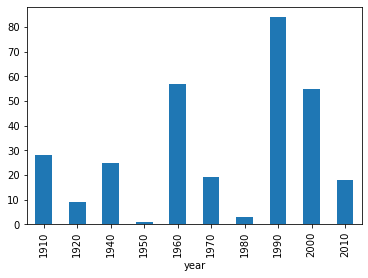

In [40]:
hamlet = cast[cast['title'] == 'Hamlet'] #We create a new data frame where everything has the title Hamlet from the cast data frame
hamlet.groupby(hamlet.year //10*10).size().plot(kind='bar') #we group it by by every 10 years and then plot it using bars

**Question 5:** How  many  leading  (n=1)  roles  were  available  to  actors,  and  how  many  to actresses, in each year of the 1950s?

In [41]:
cast1950 = cast[cast.year // 10 == 195] #creat a new data frame of every actor that worked in the 1950's(// 10 == 195) from the cast data frame
cast1950 = cast1950[cast1950.n == 1] # n is the order of the role the actor/actress is playing ,n = 1 is the leading role,
#So we now will look only at the actors with a leading role
cast1950.groupby(['year', 'type']).size() #We group the actors acording in which year they perfomed and their gender 
#and list how many actors and actresses we got in each year

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

**Question 6:** List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's

In [42]:
cast1990 = cast[cast['year'] >= 1990] #Creates a new data frame with only the cast that worked since 1990's from the cast data frame
cast1990 = cast1990[cast1990.n == 1] # We now want to look at only the actors/actresses that were the leading role(n==1)
cast1990.groupby('name').size().nlargest(10)#We list the 10 top actors with the most leading roles since 1990
#, by grouping the actors by their name and then count with sum() how many leading roles they had

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

**Question 7:** List, in order by year, each of the films in which Frank Oz has played more than 1 role

In [43]:
frankOz = cast[cast['name'] == 'Frank Oz']#Creates a new data frame with only the roles 'Frank Oz' played from the cast data frame
moreThan1Role = frankOz.groupby(['year','title']).size()# We group the roles arcoding to the movies they were a part of 
#by using 'year','title' and count how many roles he played in each movie using sum()
moreThan1Role[moreThan1Role > 1]# now we only print the movies in which Frank Oz played more than role (if the sum of roles is greater than 1)

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64